# 5. Пороговая обработка изображений - Individual task


In [15]:
import cv2 as cv
import random
from PIL import Image, ImageDraw
from matplotlib import pyplot as plt

### На вход программы пороговой обработки подается зашумленное изображение. Это изображение обрабатывается  тремя способами. В первом случае используется глобальный порог со значением 127. Во втором случае напрямую применяется порог Оцу. В третьем случае изображение сначала удаляет шум фильтром с гауссовым ядром 5*5, затем применяется пороговая обработка Оцу.


In [16]:
# Загрузим изображение и сделаем пошаговую обработку
img = cv.imread('img\cat_ind.jpg', 0)

ret1, th1 = cv.threshold(img, 127, 255, cv.THRESH_BINARY)
ret2, th2 = cv.threshold(img, 0, 255,cv.THRESH_BINARY+cv.THRESH_OTSU)

In [17]:
# Удалим шум с Гауссовым ядром 5х5 и сделаем обработку Оцу
blur = cv.GaussianBlur(img, (5, 5), 0)
ret3, th3 = cv.threshold(blur, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

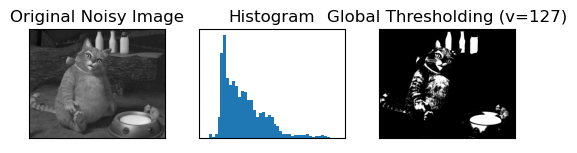

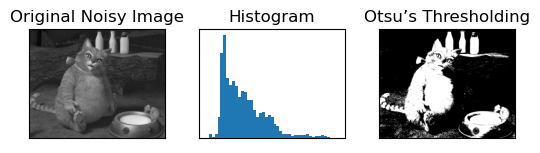

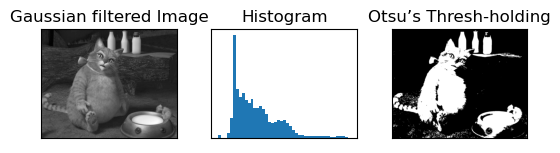

In [18]:
# Выведем оригинальное изображение, изображение после обработки и гистограмму обработанного изображения
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]

titles = ['Original Noisy Image', 'Histogram', 'Global Thresholding (v=127)', 'Original Noisy Image', 'Histogram',
          'Otsu’s Thresholding', 'Gaussian filtered Image', 'Histogram', 'Otsu’s Thresh-holding']

for i in range(3):
    plt.subplot(3, 3, i * 3 + 1), plt.imshow(images[i * 3], 'gray')
    plt.title(titles[i * 3]), plt.xticks([]),
    plt.yticks([])
    plt.subplot(3, 3, i * 3 + 2), plt.hist(images[i * 3].ravel(), 45)
    plt.title(titles[i * 3 + 1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3, 3, i * 3 + 3), plt.imshow(images[i * 3 + 2], 'gray')
    plt.title(titles[i * 3 + 2]), plt.xticks([]),
    plt.yticks([])
    plt.show()

### Провести пороговую обработку полутонового изображения с плавным изменением интенсивности.


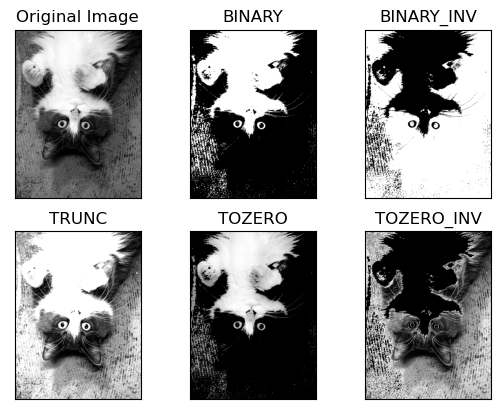

In [19]:
img = cv.imread ("img/cat_ind2.jpg" , 0)
ret, thresh1 = cv.threshold (img, 127, 255, cv.THRESH_BINARY)
ret, thresh2 = cv.threshold (img, 127, 255, cv.THRESH_BINARY_INV)
ret, thresh3 = cv.threshold (img, 127, 255, cv.THRESH_TRUNC)
ret, thresh4 = cv.threshold (img, 127, 255, cv.THRESH_TOZERO)
ret, thresh5 = cv.threshold (img, 127, 255, cv.THRESH_TOZERO_INV)

title = ['Original Image', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(title[i])
    plt.xticks([]),plt.yticks([])

plt.show ()

### Протестировать функции с адаптивным порогом, задавая последовательно два значения порога, примерно 1/3 и 2/3 от максимума интенсивности

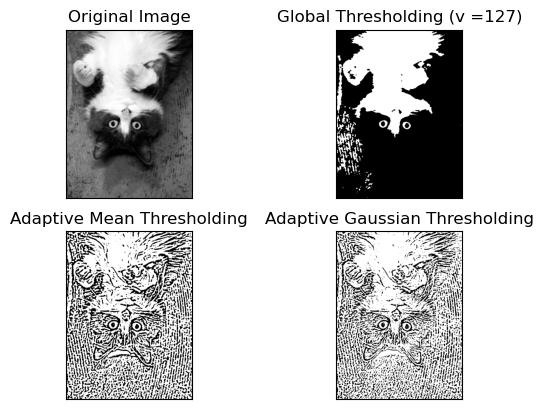

In [20]:
img = cv.imread('img/cat_ind2.jpg',0)
img = cv.medianBlur(img,5)

ret1,th1 = cv.threshold(img,127,255, cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_MEAN_C,cv.THRESH_BINARY,11,2)
th3 = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C,cv.THRESH_BINARY,11,2)

images = [img, th1, th2, th3]
titles = ['Original Image', 'Global Thresholding (v =127)', 'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']

for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show ()